In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

In [51]:
imb_df = pd.read_csv('../data/imbalance_de.csv', squeeze=True, parse_dates=True, header=None)
imb_df.head()

,0,1,2
0,2013-12-31 23:00:00,707.500,156.36
1,2013-12-31 23:15:00,966.296,81.23
2,2013-12-31 23:30:00,1018.984,104.01
3,2013-12-31 23:45:00,867.940,60.51
4,2014-01-01 00:00:00,1738.004,239.03


In [52]:
imb_df.shape

(257010, 3)

In [53]:
imb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257010 entries, 0 to 257009
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       257010 non-null  object 
 1   1       256807 non-null  float64
 2   2       257010 non-null  float64
dtypes: float64(2), object(1)
memory usage: 5.9+ MB


In [54]:
imb_df.describe()

,1,2
count,256807.000000,257010.000000
mean,80.856740,34.069293
std,494.219467,127.651278
min,-4111.964000,-6503.730000
25%,-205.410000,5.280000
50%,76.797000,38.080000
75%,365.612500,60.940000
max,3866.284000,24455.050000


In [55]:
imb_df['datetime'] = pd.to_datetime(imb_df[0])
imb_df.drop([0], axis=1, inplace=True)
imb_df.head()

,1,2,datetime
0,707.500,156.36,2013-12-31 23:00:00
1,966.296,81.23,2013-12-31 23:15:00
2,1018.984,104.01,2013-12-31 23:30:00
3,867.940,60.51,2013-12-31 23:45:00
4,1738.004,239.03,2014-01-01 00:00:00


In [56]:
imb_df.head()

,1,2,datetime
0,707.500,156.36,2013-12-31 23:00:00
1,966.296,81.23,2013-12-31 23:15:00
2,1018.984,104.01,2013-12-31 23:30:00
3,867.940,60.51,2013-12-31 23:45:00
4,1738.004,239.03,2014-01-01 00:00:00


In [57]:
imb_df = imb_df.set_index('datetime')

In [58]:
imb_df.isnull().sum()

1    203
2      0
dtype: int64

In [59]:
imb_df['weekday'] = imb_df.index.weekday

In [60]:
imb_df['date'] = imb_df.index.date

In [61]:
def fill_missing(data):
    data = data.resample('1H').median()
    data = data.interpolate(method='time', limit_direction='both')
    return data

In [62]:
imb_filled = fill_missing(imb_df)

In [63]:
imb_filled['weekday'] = imb_filled.index.weekday

In [64]:
imb_filled['date'] = imb_filled.index.date

In [65]:
imb_filled.head()

,1,2,weekday,date
datetime,,,,
2013-12-31 23:00:00,917.118,92.620,1,2013-12-31
2014-01-01 00:00:00,1264.266,82.465,2,2014-01-01
2014-01-01 01:00:00,746.810,50.305,2,2014-01-01
2014-01-01 02:00:00,-15.512,-42.080,2,2014-01-01
2014-01-01 03:00:00,-36.904,-28.995,2,2014-01-01


In [66]:
d5 = imb_filled[imb_filled.date == datetime.date(year=2021,month=5,day=22)]

<AxesSubplot:xlabel='datetime', ylabel='1'>

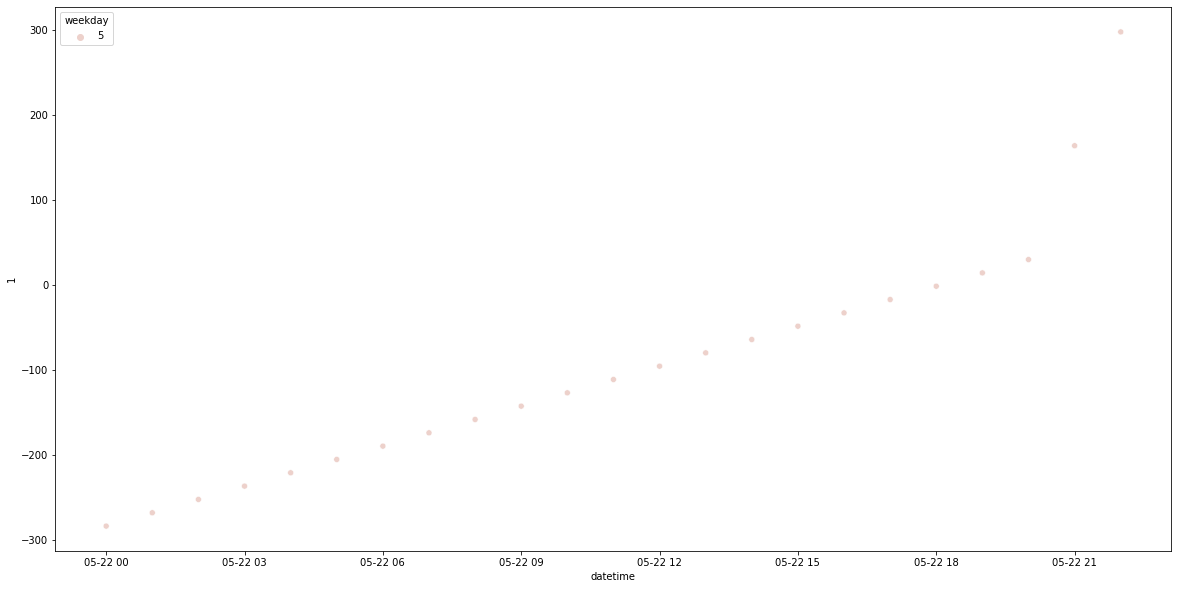

In [67]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=d5, x='datetime', y=1, hue='weekday')

In [68]:
null_data = imb_df[imb_df.isnull().any(axis=1)]

In [69]:
null_data.head(10)

,1,2,weekday,date
datetime,,,,
2015-01-02 05:15:00,NaN,-249.21,4,2015-01-02
2015-01-02 05:30:00,NaN,-287.65,4,2015-01-02
2015-01-02 05:45:00,NaN,-336.42,4,2015-01-02
2015-01-02 07:30:00,NaN,-116.46,4,2015-01-02
2015-01-19 09:30:00,NaN,122.60,0,2015-01-19
2015-01-19 09:45:00,NaN,154.10,0,2015-01-19
2015-10-31 23:00:00,NaN,0.30,5,2015-10-31
2015-10-31 23:15:00,NaN,134.63,5,2015-10-31
2015-10-31 23:30:00,NaN,27.25,5,2015-10-31


In [70]:
d1 = imb_df[imb_df.date == datetime.date(year=2021,month=5,day=22)]

<AxesSubplot:xlabel='datetime', ylabel='1'>

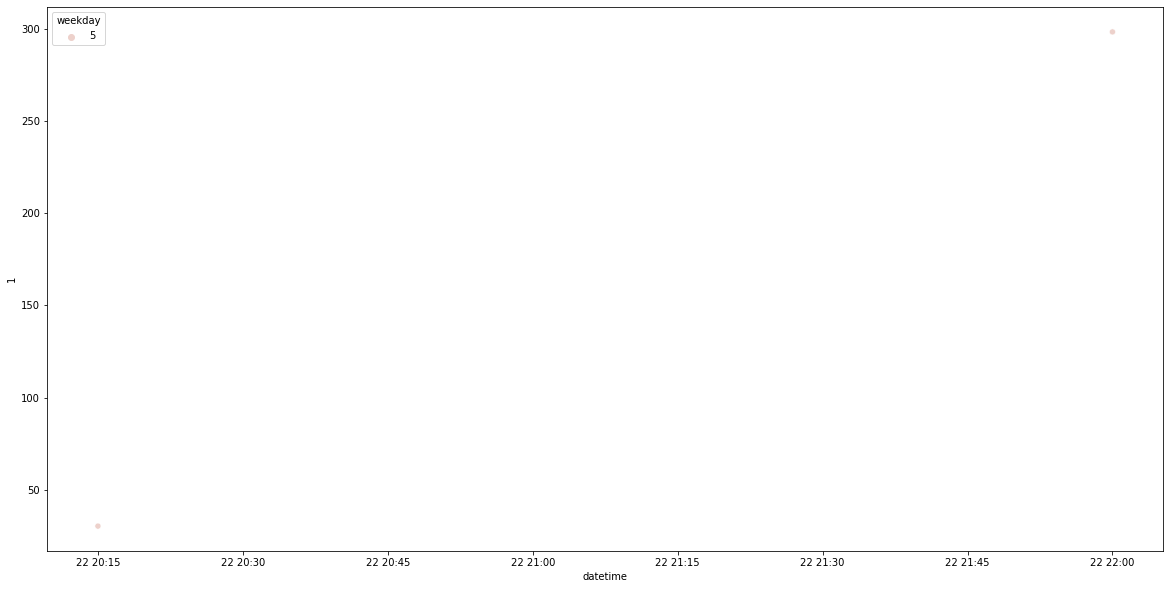

In [71]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=d1, x='datetime', y=1, hue='weekday')